<h1 style="text-align: center;">Microtraffic in Quito 2018-2021</h1>

---

Drug microtrafficking has become a growing problem in LATAM, particularly in Ecuador. The country is currently facing increased insecurity that could be addressed through emerging technologies like data science. The primary purpose of this notebook is to explore how data analysis can help forecast potential outcomes and contribute to solving this crisis.

We will work with data collected by:
- [Instituto de Geografía (USFQ)](https://data.humdata.org/dataset/ecuador-microtrafficking-crime-in-quito?force_layout=desktop)
  
All microtrafficking cases were compiled by the National Antinarcotics Analysis Directorate of the Ecuadorian National Police.

In this initial analysis, we focus on:
1. Data visualization using **GeoPandas** and **Matplotlib**
2. Creating animated heatmaps to understand temporal patterns (using **FuncAnimation**)

---

## About the Data 

In the folder 'microtrafico' we well find files with extension: DBF, PRJ, SBN, SBX, SHP, SHX. It is important to **keep all this files in the same folder** since each one contributes an specific parameter for geopandas to read.

Description:
 - SHP (Shapefile): The primary file storing geometric data (points, lines, polygons). Without .shp, the dataset is unusable. GeoPandas uses this as the core file.
 - SHX (Shape Index File): Index file for fast spatial queries (links geometry to attributes). It is required for reading/writing shapefiles.
 - DBF (Database File): Stores attribute data (e.g., population, crime type) linked to geometries. Without .dbf, we will lose all our non-geometric data.
 - PRJ (Projection File): Defines the coordinate reference system (CRS) of the data (e.g., WGS84, UTM).

When we use
```python
df = gpd.read_file('Data.shp')
```
We open SHP+SHX+DBF+PRJ

Since the data exceeds 25mb, and cannot be loaded in Github. You will have to download it from this [link](https://data.humdata.org/dataset/ecuador-microtrafficking-crime-in-quito?force_layout=desktop) and save all the files in a folder named *'microtrafico'*

Place that folder in the **same directory** as your Jupyter notebook. Do not forget that the most important file in this folder should be **A_Microtraffic_Quito_Parish_2018_2021.shp**

---
## Import the Libraries

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import geopandas as gpd
from matplotlib.animation import FuncAnimation

In [63]:
df = gpd.read_file(r"microtrafico\A_Microtraffic_Quito_Parish_2018_2021.shp")
display(df)

,Category,Type,PARISH,Jan2018,Feb2018,Mar2018,April2018,May2018,Jun2018,Jul2018,...,Dec2020,Total2020,Jan2021,Feb2021,Mar2021,April2021,May2021,Total2021,TOTAL_GEN,geometry
0,Internal consumption traffic,Microtraffic,BELISARIO QUEVEDO,5.0,0.0,7.0,5.0,4.0,4.0,3.0,...,3.0,38.0,1.0,5.0,4.0,3.0,1.0,14.0,117.0,"POLYGON ((779343.583 9979691.072, 779342.915 9..."
1,Internal consumption traffic,Microtraffic,CARCELEN,7.0,2.0,3.0,6.0,3.0,4.0,4.0,...,1.0,33.0,4.0,1.0,0.0,3.0,4.0,12.0,168.0,"POLYGON ((783385.111 9992176.828, 783385.065 9..."
2,Internal consumption traffic,Microtraffic,CENTRO HISTORICO,16.0,9.0,15.0,16.0,20.0,8.0,13.0,...,25.0,160.0,16.0,19.0,15.0,7.0,10.0,67.0,514.0,"POLYGON ((777729.768 9976037.308, 777729.78 99..."
3,Internal consumption traffic,Microtraffic,CHILIBULO,0.0,1.0,1.0,0.0,0.0,1.0,1.0,...,2.0,10.0,0.0,0.0,1.0,0.0,0.0,1.0,27.0,"POLYGON ((774632.095 9976554.574, 774630.608 9..."
4,Internal consumption traffic,Microtraffic,CHILLOGALLO,2.0,4.0,1.0,1.0,1.0,4.0,4.0,...,1.0,13.0,1.0,3.0,3.0,2.0,3.0,12.0,63.0,"POLYGON ((772438.517 9969416.064, 772438.453 9..."
5,Internal consumption traffic,Microtraffic,CHIMBACALLE,2.0,2.0,2.0,2.0,2.0,4.0,2.0,...,1.0,27.0,0.0,0.0,3.0,2.0,2.0,7.0,84.0,"POLYGON ((777702.663 9974287.128, 777700.965 9..."
6,Internal consumption traffic,Microtraffic,COCHAPAMBA,5.0,5.0,0.0,1.0,1.0,0.0,1.0,...,1.0,20.0,3.0,2.0,3.0,1.0,4.0,13.0,78.0,"POLYGON ((777927.264 9986307.015, 777927.498 9..."
7,Internal consumption traffic,Microtraffic,COMITE DEL PUEBLO,5.0,1.0,0.0,5.0,3.0,4.0,7.0,...,3.0,32.0,2.0,1.0,2.0,9.0,2.0,16.0,125.0,"POLYGON ((782568.375 9988043.641, 782568.941 9..."
8,Internal consumption traffic,Microtraffic,CONCEPCION,3.0,1.0,0.0,2.0,3.0,2.0,3.0,...,1.0,20.0,2.0,1.0,2.0,1.0,1.0,7.0,67.0,"POLYGON ((779383.878 9986393.671, 779384.56 99..."
9,Internal consumption traffic,Microtraffic,COTOCOLLAO,2.0,1.0,0.0,4.0,2.0,1.0,3.0,...,2.0,37.0,5.0,3.0,11.0,3.0,2.0,24.0,125.0,"POLYGON ((778561.861 9988663.184, 778559.99 99..."


Our df has quantitative information of every neighborhood in Quito. The colmuns represent the month and the values in each column corresponds to the amount of microtraffic cases discovered during that month. The Geometry column stores the spacial of each neighborhood. We will create a list with all the months of our data, excluding Total_Year, and name it 'months'

In [56]:
time = list(df.columns)
time

['Category',
 'Type',
 'PARISH',
 'Jan2018',
 'Feb2018',
 'Mar2018',
 'April2018',
 'May2018',
 'Jun2018',
 'Jul2018',
 'Aug2018',
 'Sep2018',
 'Oct2018',
 'Nov2018',
 'Dec2018',
 'Total2018',
 'Jan2019',
 'Feb2019',
 'Mar2019',
 'April2019',
 'May2019',
 'Jun2019',
 'Jul2019',
 'Aug2019',
 'Sep2019',
 'Oct2019',
 'Nov2019',
 'Dec2019',
 'Total2019',
 'Jan2020',
 'Feb2020',
 'Mar2020',
 'April2020',
 'May2020',
 'Jun2020',
 'Jul2020',
 'Aug2020',
 'Sep2020',
 'Oct2020',
 'Nov2020',
 'Dec2020',
 'Total2020',
 'Jan2021',
 'Feb2021',
 'Mar2021',
 'April2021',
 'May2021',
 'Total2021',
 'TOTAL_GEN',
 'geometry']

In [57]:
months = time[3:15] + time[16:28] + time[29:41]+ time[42:47]
months_tag = [s[:-4] + ' ' + s[-4:] for s in months]
print(months_tag)

['Jan 2018', 'Feb 2018', 'Mar 2018', 'April 2018', 'May 2018', 'Jun 2018', 'Jul 2018', 'Aug 2018', 'Sep 2018', 'Oct 2018', 'Nov 2018', 'Dec 2018', 'Jan 2019', 'Feb 2019', 'Mar 2019', 'April 2019', 'May 2019', 'Jun 2019', 'Jul 2019', 'Aug 2019', 'Sep 2019', 'Oct 2019', 'Nov 2019', 'Dec 2019', 'Jan 2020', 'Feb 2020', 'Mar 2020', 'April 2020', 'May 2020', 'Jun 2020', 'Jul 2020', 'Aug 2020', 'Sep 2020', 'Oct 2020', 'Nov 2020', 'Dec 2020', 'Jan 2021', 'Feb 2021', 'Mar 2021', 'April 2021', 'May 2021']


## Plot

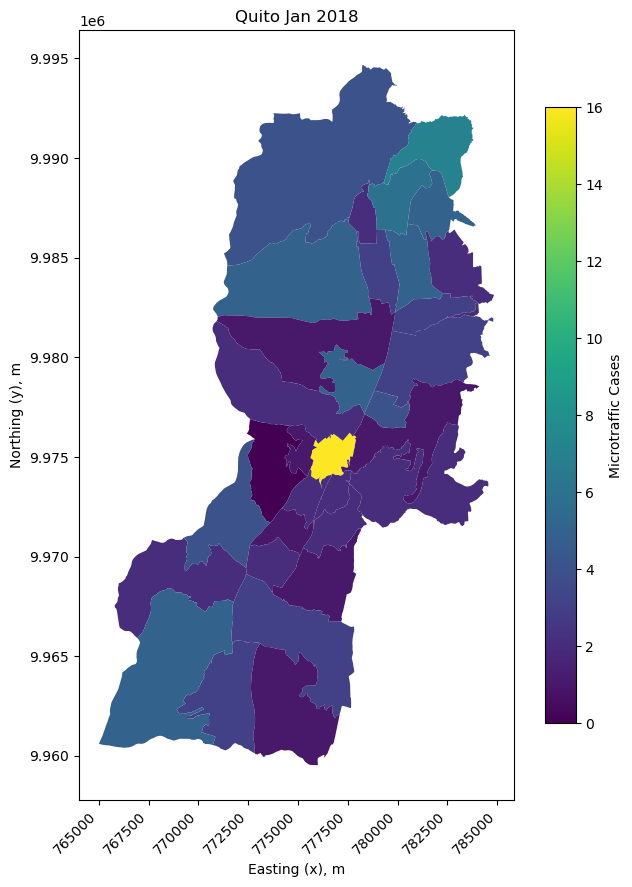

In [58]:
def plot_microtraffic(month, month_name):
    fig, ax = plt.subplots(figsize=(8, 10))
    df.plot(
        column= month,
        legend=True,
        ax=ax,
        legend_kwds={
            'shrink': 0.8,     # Scale the height (0.6 = 60% of the plot height)
            'aspect': 20,       # Ratio of long to short dimensions (height/width)
            'pad': 0.05,         # Distance between plot and colorbar (as fraction of plot width)
            'label': 'Microtraffic Cases' # Custom label
        }
    )
    ax.set_title('Quito '+month_name )
    plt.xlabel('Easting (x), m')
    plt.ylabel('Northing (y), m')
    plt.xticks(rotation=45, ha='right')
    plt.show()
    
plot_microtraffic(months[0], months_tag[0])

## Coordinates
Quito spans UTM Zone 17S (west of 78°W). The S indicates the southern hemisphere UTM grid, which uses a false northing of 10,000,000 meters to avoid negative values.

Our coordinates include a false easting of 500,000 meters (standard for UTM).
Actual Easting = 775,000 - 500,000 = 275,000 m east of the central meridian.

Northing: 9.98 × 10⁶ = 9,900,000

False northing for southern UTM zones is 10,000,000 m.
Actual Northing = 9,980,000 - 10,000,000 = -20,000 m (20 km south of the equator).

## Animation

In [59]:
# Calculate global min and max for consistent coloring
vmin, vmax = df[months].min().min(), df[months].max().max()

# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 10))


# Configure colormap
cmap = 'viridis'
norm = plt.Normalize(vmin=vmin, vmax=vmax)
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
sm.set_array([])

# Add colorbar
cbar = fig.colorbar(sm, ax=ax, shrink=0.6, aspect=30, pad=0.05, label='Microtraffic Cases')

def update(frame_index):
    ax.clear()
    ax.set_xlabel('Easting (x), m')
    ax.set_ylabel('Northing (y), m')
    
    current_month = months[frame_index]
    current_tag = months_tag[frame_index]
    
    # Plot current month's data
    df.plot(
        column=current_month,
        ax=ax,
        cmap=cmap,
        norm=norm,
        legend=False  # Prevent new colorbars
    )
    ax.set_title(f'Quito {current_tag} ')
    plt.xticks(rotation=45, ha='right')
    return ax.collections + [ax.title]

# Create animation
anim = FuncAnimation(
    fig,
    update,
    frames=len(months),  # Animate first four months
    interval=500,  # Adjust speed as needed
    blit=False
)

anim.save(
    'microtraffic_video_ver.mp4',
    writer='ffmpeg',
    fps=1,
    dpi=150,
    codec='libx264',
    bitrate=5000
)

plt.close()


---

### Contact Information  
For inquiries regarding this code or analysis, please contact:  

**Email:** [red.neuronalec@gmail.com](mailto:red.neuronalec@gmail.com)  
**Name:** Minta B.  

---